In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df1 = pd.read_csv('L4_Train.csv')
df2 = pd.read_csv('L4_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (56900, 8)
Shape of df2: (12040, 8)


In [ ]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,4,2024-04-18 05:17:06.000,0.0,1001.65,24.76,83.50,23.33,0.00
1,4,2024-04-18 05:18:06.000,0.0,1001.67,24.78,83.34,29.17,0.00
2,4,2024-04-18 05:19:06.000,0.0,1001.70,24.78,83.48,37.50,0.00
3,4,2024-04-18 05:20:06.000,0.0,1001.71,24.80,83.49,46.67,0.00
4,4,2024-04-18 05:21:06.000,0.0,1001.71,24.81,83.43,59.17,0.00
...,...,...,...,...,...,...,...,...
68935,4,2024-10-22 17:21:07.000,0.0,1007.73,27.34,100.00,68.33,0.00
68936,4,2024-10-22 17:22:07.000,0.0,1007.74,27.33,100.00,66.67,0.01
68937,4,2024-10-22 17:23:07.000,0.0,1007.71,27.31,100.00,65.83,0.00
68938,4,2024-10-22 17:24:07.000,0.0,1007.73,27.32,100.00,60.83,0.00


In [9]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,68940.0,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000
mean,4.0,0.493628,1005.136008,35.616262,63.841402,31680.571446,367.453529
std,0.0,0.960914,3.092648,9.030113,29.567548,34541.841178,491.331759
min,4.0,0.000000,996.760000,19.100000,12.890000,20.000000,0.000000
25%,4.0,0.000000,1003.020000,27.810000,34.750000,5106.670000,6.620000
50%,4.0,0.000000,1004.700000,33.970000,62.550000,18387.500000,99.730000
75%,4.0,0.520000,1007.050000,43.090000,97.710000,46422.717500,630.790000
max,4.0,6.790000,1014.840000,56.340000,100.000000,117758.200000,2204.580000


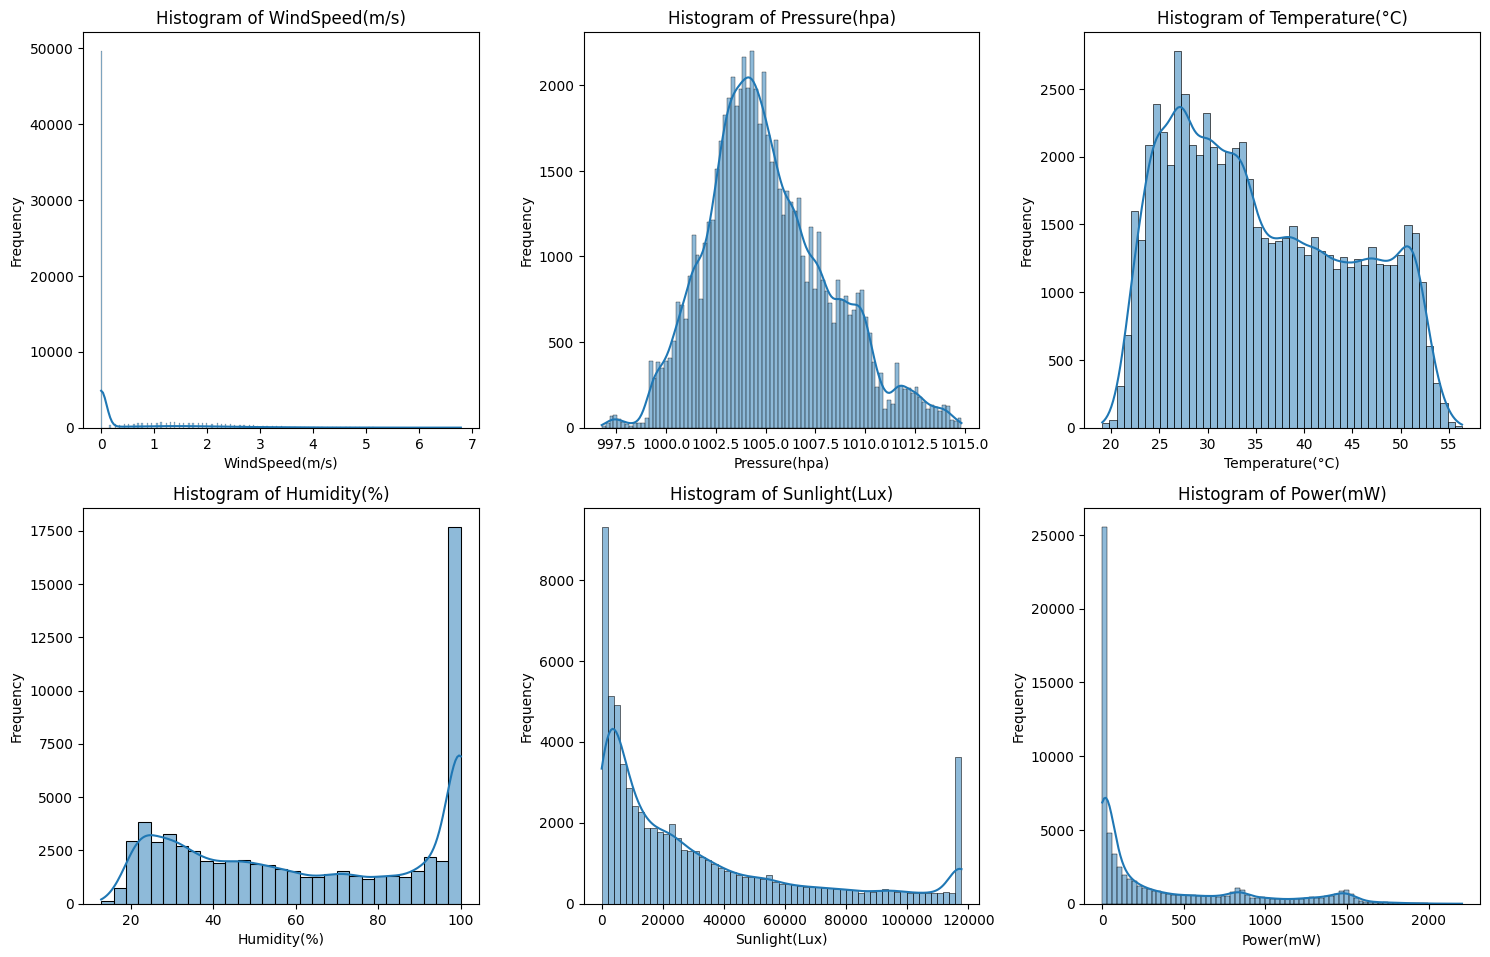

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
2104,4,2024-04-21 10:14:05.000,1.22,1004.83,42.38,25.48,117758.2,1296.64
2109,4,2024-04-21 10:19:05.000,1.92,1004.73,43.57,24.29,117758.2,906.94
2110,4,2024-04-21 10:20:05.000,1.65,1004.71,44.19,23.04,117758.2,1067.43
2111,4,2024-04-21 10:21:05.000,2.18,1004.75,44.51,23.22,117758.2,782.34
2114,4,2024-04-21 10:24:05.000,1.22,1004.66,45.35,21.96,117758.2,795.16
...,...,...,...,...,...,...,...,...
68595,4,2024-10-22 11:41:07.000,0.00,1008.20,40.75,81.49,117758.2,852.04
68596,4,2024-10-22 11:42:07.000,0.00,1008.28,40.39,81.42,117758.2,842.36
68601,4,2024-10-22 11:47:07.000,0.00,1008.19,38.83,89.32,117758.2,920.43
68613,4,2024-10-22 11:59:07.000,0.00,1007.92,38.84,93.29,117758.2,930.62


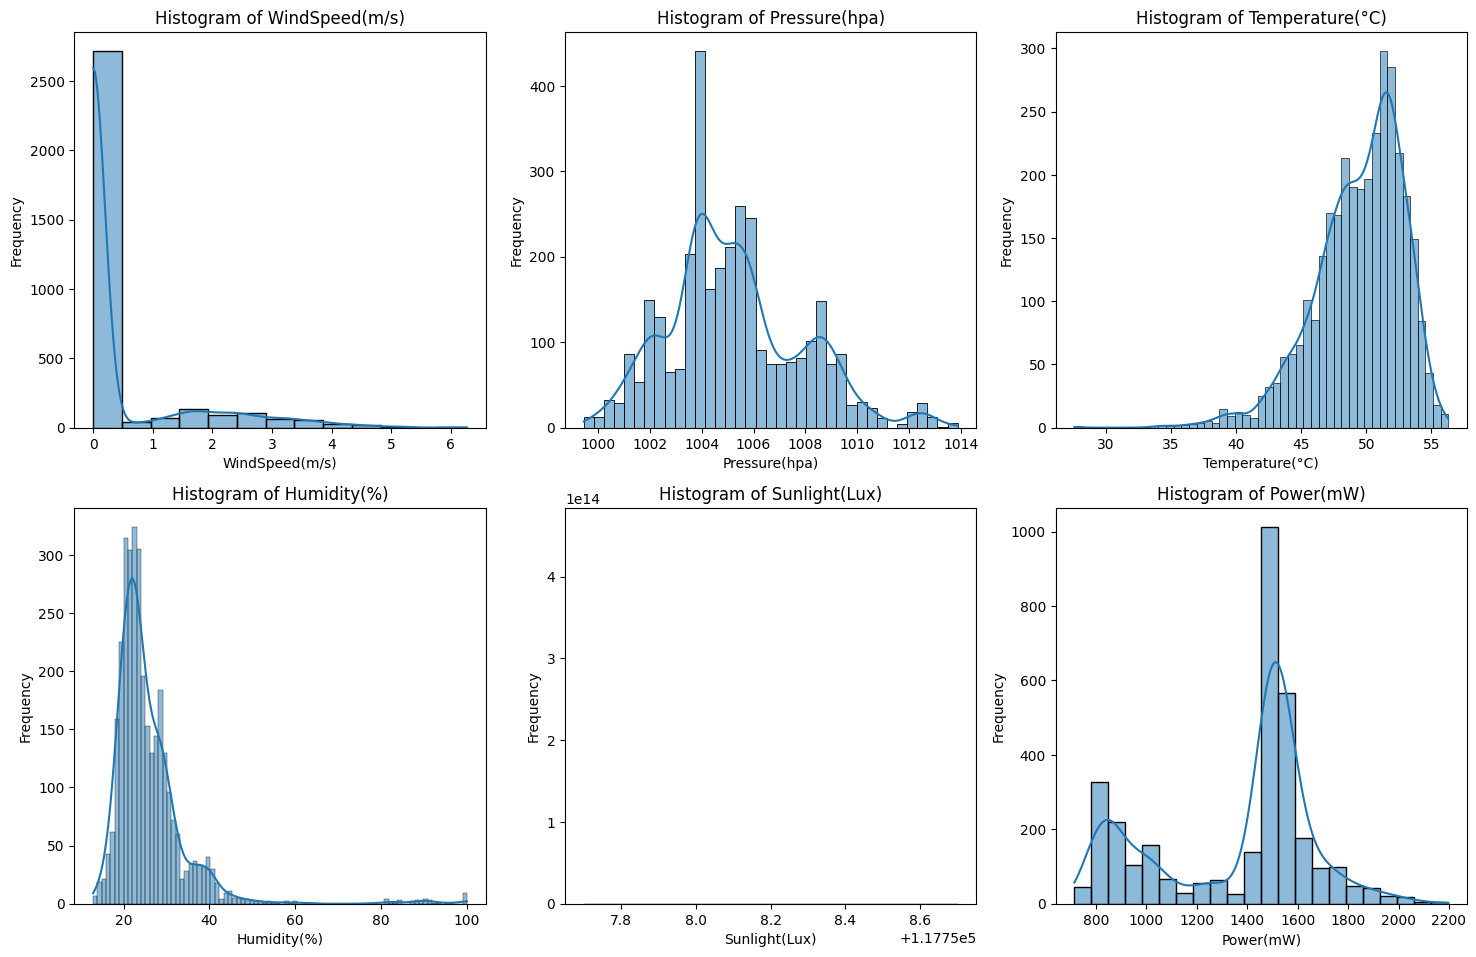

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [14]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0136 * Sunlight(Lux) + -54.0732


In [15]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0136
intercept = -54.0732

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [16]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,68940.0,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000,68940.000000
mean,4.0,0.493628,1005.136008,35.616262,63.841402,31019.979881,367.453529
std,0.0,0.960914,3.092648,9.030113,29.567548,33372.766256,491.331759
min,4.0,0.000000,996.760000,19.100000,12.890000,20.000000,0.000000
25%,4.0,0.000000,1003.020000,27.810000,34.750000,5106.670000,6.620000
50%,4.0,0.000000,1004.700000,33.970000,62.550000,18387.500000,99.730000
75%,4.0,0.520000,1007.050000,43.090000,97.710000,46422.717500,630.790000
max,4.0,6.790000,1014.840000,56.340000,100.000000,165542.147059,2204.580000


In [17]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [18]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240418051704,0.00,1001.69,24.80,83.34,79.00,0.00
1,20240418052704,0.00,1001.61,24.77,83.16,439.50,0.07
2,20240418053704,0.38,1001.32,24.84,81.40,1425.92,0.58
3,20240418054704,0.25,1001.05,25.22,79.73,4383.42,5.01
4,20240418055704,0.27,1000.90,25.96,77.22,8956.00,16.25
...,...,...,...,...,...,...,...
6889,20241022163604,0.00,1007.48,28.21,100.00,2179.17,4.24
6890,20241022164604,0.00,1007.61,27.83,100.00,721.08,0.47
6891,20241022165604,0.00,1007.72,27.55,100.00,291.75,0.06
6892,20241022170604,0.00,1007.72,27.42,100.00,193.00,0.03


# HEATMAP

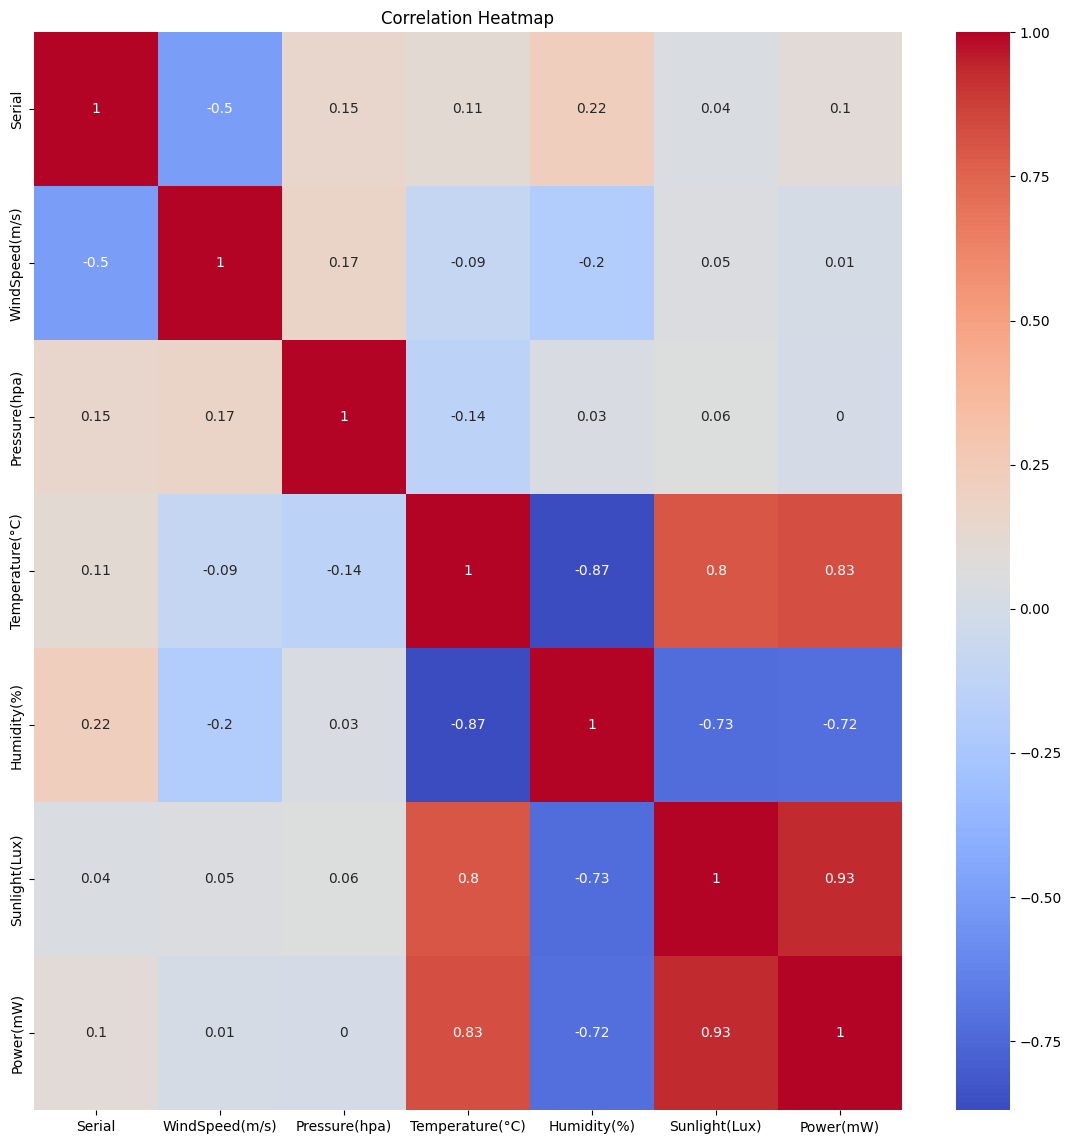

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.930295
Temperature(°C)    0.829611
Humidity(%)        0.721360
Serial             0.103809
WindSpeed(m/s)     0.011149
Pressure(hpa)      0.002690
Name: Power(mW), dtype: float64

In [21]:
df.to_csv('L4_Train_Revise.csv', index=False)